In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
#데이터 불러오기
df=pd.read_csv('../data/kospi3.csv').sort_index()
df.head()

,date,close
0,2016-05-25,1961
1,2016-05-24,1938
2,2016-05-23,1955
3,2016-05-20,1948
4,2016-05-19,1947


<AxesSubplot:xlabel='date'>

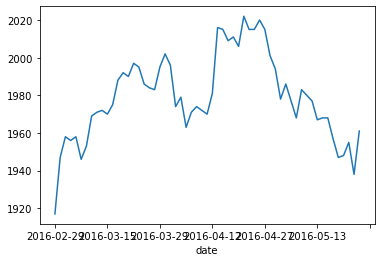

In [10]:
ts=pd.read_csv('../data/kospi3.csv',header=0, index_col=0, squeeze=True).sort_index()
ts.plot()

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

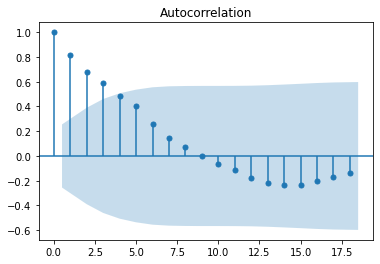

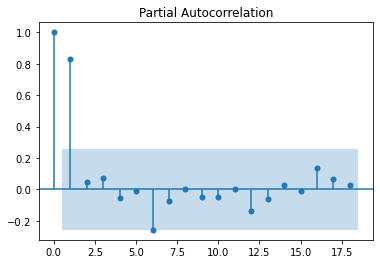

In [12]:
#acf, pacf그리기
plot_acf(ts)
plot_pacf(ts)
plt.show()

#[결과해석]
#ACF: 첫번째 구간(영향력 미치는 구간, 신뢰구간 벗어난 포인트4개), 그 외 실내공간(영향력 없음)
#PCAF:첫번째 구간(영향력 미치는 구간, 신뢰구간 벗어난 포인트2개), 그 외 실내공간(영향력 없음)


<AxesSubplot:xlabel='date'>

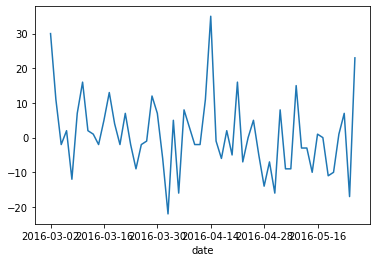

In [17]:
#차분
#차분 곡선 그래프(1차 차분)

diff_1=ts.diff(periods=1).iloc[1:]
diff_1.plot()

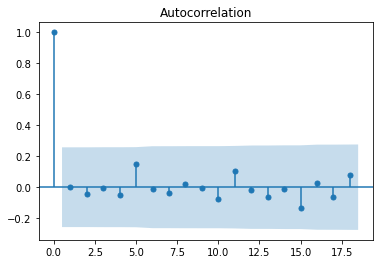

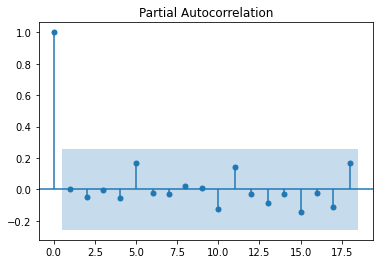

In [24]:
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

#[결과해석]
#ACF 하나(자기 자신) 제외 나머지는 실내공간에 초진
#PACF 대부분 신뢰구간에 있지만 들쭉날쭉하다.

In [19]:
#차분의 차분 그래프

diff_diff_1=diff_1.diff(periods=1).iloc[1:]

<AxesSubplot:xlabel='date'>

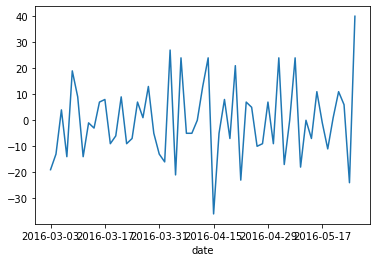

In [20]:
diff_diff_1.plot()

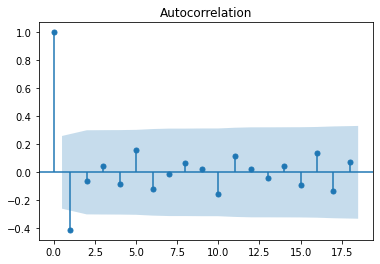

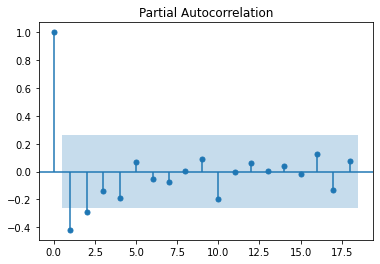

In [23]:
plot_acf(diff_diff_1)
plot_pacf(diff_diff_1)
plt.show()

In [27]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(ts, order=(1,2,1)) #(p.d,q): 차분을 두번(d를 2로설정)
fitted_model=model.fit(trend='c', full_output=True, disp=1)
#Whether to include a constant or not.'c' includes constant, nc' no constant
print(fitted_model.summary())

#[결과해석]
#P>|z|(p_value): cont 0.068, ar.L1 0.790(>0.05) 유의하지 않다.
#ar 삭제 >> 0으로 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                   57
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -217.690
Method:                       css-mle   S.D. of innovations             10.632
Date:                Tue, 22 Feb 2022   AIC                            443.379
Time:                        13:23:32   BIC                            451.551
Sample:                             2   HQIC                           446.555
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1465      0.080     -1.823      0.068      -0.304       0.011
ar.L1.D2.close    -0.0396      0.149     -0.266      0.790      -0.332       0.252
ma.L1.D2.close    -1.0000      0.050

In [28]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(ts, order=(0,2,1)) #(p.d,q): 차분을 두번(d를 2로설정)
fitted_model=model.fit(trend='c', full_output=True, disp=1)
#Whether to include a constant or not.'c' includes constant, nc' no constant
print(fitted_model.summary())

#여전히 P>|z|(>0.05)>>trend'c를 'nc'로 변경

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                   57
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -217.725
Method:                       css-mle   S.D. of innovations             10.646
Date:                Tue, 22 Feb 2022   AIC                            441.450
Time:                        13:25:13   BIC                            447.579
Sample:                             2   HQIC                           443.832
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1464      0.084     -1.754      0.080      -0.310       0.017
ma.L1.D2.close    -1.0000      0.050    -20.045      0.000      -1.098      -0.902
                                    

In [30]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(ts, order=(0,2,1)) #(p.d,q): 차분을 두번(d를 2로설정)
fitted_model=model.fit(trend='nc', full_output=True, disp=1)
#Whether to include a constant or not.'c' includes constant, nc' no constant
print(fitted_model.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                   57
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -218.944
Method:                       css-mle   S.D. of innovations             11.055
Date:                Tue, 22 Feb 2022   AIC                            441.887
Time:                        13:27:06   BIC                            445.974
Sample:                             2   HQIC                           443.475
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ma.L1.D2.close    -0.9430      0.059    -15.987      0.000      -1.059      -0.827
                                    Roots                                    
                  Real          Imaginary

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

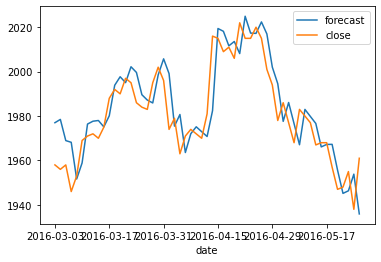

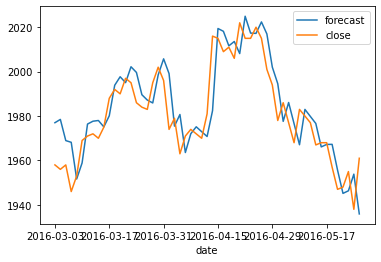

In [31]:
fitted_model.plot_predict()
#close: 실제 데이터, forecast: 예측 데이터>> 정상성을 가지고 있어 유사함
#https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html

In [32]:
#예측
#1단계 시점 예측

fore=fitted_model.forecast(steps=1) #단기 내년
print(fore)

(array([1960.35783783]), array([11.0549821]), array([[1938.69047106, 1982.02520461]]))


In [34]:
fore_3=fitted_model.forecast(steps=3) #중기 3년
print(fore_3)

(array([1960.35783783, 1959.71567567, 1959.0735135 ]), array([11.0549821, 16.0855691, 20.2581311]), array([[1938.69047106, 1982.02520461],
       [1928.18853956, 1991.24281178],
       [1919.36830615, 1998.77872085]]))


In [35]:
fore_5=fitted_model.forecast(steps=5) #장기 5년
print(fore_5)

#결과해석: 신뢰구간이 떨어지는 것을 확인

(array([1960.35783783, 1959.71567567, 1959.0735135 , 1958.43135134,
       1957.78918917]), array([11.0549821 , 16.0855691 , 20.2581311 , 24.04048294, 27.60792512]), array([[1938.69047106, 1982.02520461],
       [1928.18853956, 1991.24281178],
       [1919.36830615, 1998.77872085],
       [1911.31287061, 2005.54983206],
       [1903.67865024, 2011.8997281 ]]))
